# Binary Classification

**Name**: ZHU GUANGYU  
**Student ID**: 20165953  
**Github Repo**: [assignment08](https://github.com/z1ggy-o/cv_assignment/tree/master/assignment08)  

---

In a *classification problem*, the outcome  takes on only a finit number of values. In the simplest case, outcome has only two values, for example TRUE or FALSE. This is called the *binary classification problem*.

As in real-valued data fitting, we assume that an approxomate relation ship of the form $y \approx f(x)$ holds, where $f: R^{n} \rightarrow {-1, +1}$. The model $\hat{f}$ is called a *classifier*.

For a given data point x, y with predicted outcome $\hat{y} = \hat{f}(x)$, there are four possibilities:

- *True positive*: $y = +1$ and $\hat{y} = +1$.
- *True negative*: $y = -1$ and $\hat{y} = -1$.
- *False positive*: $y = -1$ and $\hat{y} = +1$.
- *False negative*: $y = +1$ and $\hat{y} = -1$.

## Least squares classfier

Least squares is a very sople method for classification.

First, carry out ordinary real-valued least squares fitting of the outcome, ignoring for the moment that the outcome $y$ takes on only the values $-1 and +1$. We choose *basis functions* $f_{1},\cdots,f_{p}$, and the *perameters* $\theta_{1},\cdots,\theta_{p}$ so as to <u>minimize the sum squared error</u>

$$(y^{1}-\tilde{f}(x^{1}))^{2}+\cdots+(y^{N}-\tilde{f}(x^{N}))^{2},$$

where $\tilde{f} = \theta_{1}f_{1}(x)+\cdots\theta_{p}f_{p}(x)$. The function $\tilde{f}$ is the least squares fit over our data set, it is a number.

Our final classifier is

$$\hat{f}(x) = sign(\tilde{f}(x)),$$

We call this classifier the *least squares classifier*.

## Use least squares classfier to do handwritten digit classification

Here, we define our sign function as

$$ sign(x)=\left\{
\begin{aligned}
+1 & & if  x \geq 0 \\
-1 & & if  x < 0 
\end{aligned}
\right.
$$

and we have basis function(feature function):

$$f_{i}(x) = x_{i}$$

The partitioning function is 

$$\tilde{f}(x,\theta) = \theta_{1}f_{1}(x) + \theta_{2}f_{2}(x) + \cdots + \theta_{p}f_{p}(x)$$

Change it to matrix form, we get $f \cdot \theta = y$. By *pseudo inverse* $(A^{T}A)^{-1}A$ we can find $\theta$.

---

### Read data sets

First, let import the data set. We have two data sets, one for training, one for testing. Each element is a image that has height 28 and width 28 pixels.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

# number of training images: 60000
# number of testing images: 10000

To reduce the bias, we need to normalize the data.

In [2]:
#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

Normalize each pixel, and put image data into a 764*num_image matrix.

In [3]:
#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)  # 764 * num_trian matrix
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])  # convert to float type
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector  # each column is a image

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

### Define feature function, then apply it on data


In [4]:
def f_i(x, i):
    return x[i]


def create_A(func, data, num_data, size):
    """Build f(x) matrix
    
    Apply feature function to each data image,
    get a matrix
    """
    
    A = []
    
    for i in range(num_data):
        img = data[:, i]  # ith image(column)
        row = [func(img, j) for j in range(size)]
        A.append(row)
    
    return np.array(A)
            
A = create_A(f_i, list_image_train, num_train, size_row*size_col)

### Compute $\theta$

We have $A\theta = y$, while $A$ is the matrix of feature function apply on data set, $\theta$ is perameters, and $y$ is the label.

Because we just want to separate 0 and other numbers, we need to process label $y$ which gives 0's image $+1$ and other number's image $-1$.

Through pseudo inverse $(A^{T}A)^{-1}A$ we can compute the $\theta$. Here we use `np.linalg.pinv` to get $A^{-1}$.

In [5]:
# process label array
def process_label(labels):
    result = []
    for label in labels:
        if label == 0:
            result.append(1)
        else:
            result.append(-1)
    
    return result

        
def theta(A, y):
    A_inv = np.linalg.pinv(A)
    theta = np.inner(A_inv, y)
    
    return theta

label_train = process_label(list_label_train)
theta_arr = theta(A, label_train)

### Plot $\theta$ graph

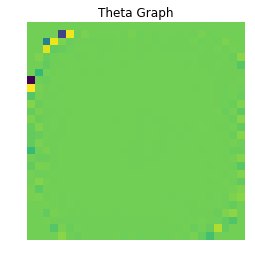

In [6]:
theta_matrix = theta_arr.reshape((28, 28))

plt.title("Theta Graph")
plt.imshow(theta_matrix)
plt.axis("off")
plt.show()

### Define classifier $\hat{f}(x)$

We can define $\tilde{ｆ}$ since we have got $\theta$. 

Now we can create the classifier $\hat{f}(x) = sign(\tilde{f}(x)),$ while 
$$ sign(x)=\left\{
\begin{aligned}
+1 & & if  x \geq 0 \\
-1 & & if  x < 0 
\end{aligned}
\right.
$$

In [16]:
def sign_func(x):
    if x >= 0:
        return 1
    else:
        return -1
    

def lsf(f_i, data, num_data, size, theta):
    # least squares fit
    A = create_A(f_i, data, num_data, size)
    return np.inner(A, theta)


def classifier(f_i, data, num_data, size, theta, sign_func, lsf):
    f_tilde = lsf(f_i, data, num_data, size, theta)
    f_hat = list(map(sign_func, f_tilde))
    
    return np.array(f_hat)

### Prediction of testing set

Put testing data set into our classifier we can get the prediction value.

In [17]:
prediction = classifier(f_i, list_image_test, num_test, size_row*size_col, theta_arr, sign_func, lsf)

### Count predicted outcome: TP, FP, TN, and FN

We have already got the prediction by our classifier $\hat{f}(x)$, now let's compare it with the label of testing data set to check how it works.

The outcome are

- *True positive*: $y = +1$ and $\hat{y} = +1$.
- *True negative*: $y = -1$ and $\hat{y} = -1$.
- *False positive*: $y = -1$ and $\hat{y} = +1$.
- *False negative*: $y = +1$ and $\hat{y} = -1$.

Here, we still need to process the testing data label.

In [21]:
def outcomes(label, prediction):
    """count outcomes of prediction
    
    Input:
        label(array): correct labels
        prediction(array): prediction of classifier
    Return:
        A dictionary contains the indices of each outcome type
        tp: true positive
        tn: true negative
        fp: false positive
        fn: flase negative
    """
    
    length = len(label)
    tp = []  
    fp = []
    tn = []
    fn = []
    
    for i in range(length):
        if label[i] == 1 and prediction[i] == 1:
            tp.append(i)
        elif label[i] == 1 and prediction[i] == -1:
            fn.append(i)
        elif label[i] == -1 and prediction[i] == -1:
            tn.append(i)
        else:
            fp.append(i)
            
    outcome = {'TP': tp,
               'FP': fp,
               'TN': tn,
               'FN': fn}
    
    return outcome


label_test = process_label(list_label_test)
outcome_dic = outcomes(label_test, prediction)

#### Print out evaluation table.

In [22]:
from prettytable import PrettyTable

table = PrettyTable()
for i, j in outcome_dic.items():
    table.add_column(i, [len(j)])

print(' Evaluation Value Table')    
print(table)

 Evaluation Value Table
+-----+----+------+----+
|  TP | FP |  TN  | FN |
+-----+----+------+----+
| 917 | 61 | 8959 | 63 |
+-----+----+------+----+


### Plot average images

In [23]:
def average_img(data, indices):
    # compute the average value of one outcome type
    
    size = 28 * 28
    sum_img = np.zeros(size)
    
    for index in indices:
        img = data[:, index]
        sum_img += img
    
    num_img = len(indices)
    
    return sum_img / num_img


def plot_graph(img, title):
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()


#### True positive

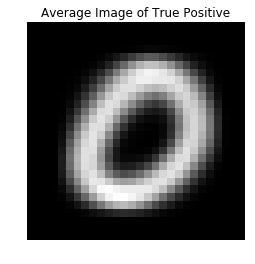

In [24]:
# True positive
tp = average_img(list_image_test, outcome_dic['TP'])
tp_matrix = tp.reshape((28, 28))

plot_graph(tp_matrix, 'Average Image of True Positive')

#### False Positive

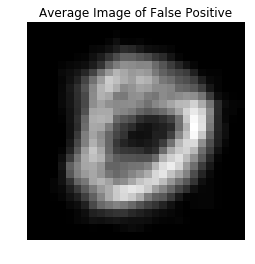

In [13]:
# False positive
fp = average_img(list_image_test, outcome_dic['FP'])
fp_matrix = fp.reshape((28, 28))

plot_graph(fp_matrix, 'Average Image of False Positive')

#### True Negative

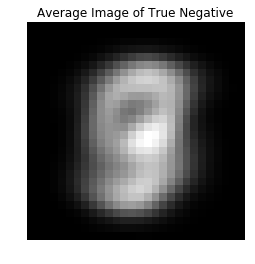

In [25]:
# True negative
tn = average_img(list_image_test, outcome_dic['TN'])
tn_matrix = tn.reshape((28, 28))

plot_graph(tn_matrix, 'Average Image of True Negative')

#### False Negative

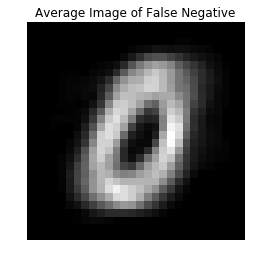

In [15]:
# False negative
fn = average_img(list_image_test, outcome_dic['FN'])
fn_matrix = fn.reshape((28, 28))

plot_graph(fn_matrix, 'Average Image of False Negative')

From above images we can tell, both *True Positive* and *False Negative*'s images are clear zero images.

*True negative* mixed number 1 to 9, so the image is blurred.